In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from matplotlib import cm
import itertools

In [3]:
quakes_df = pd.read_csv('data/earthquakes.csv')

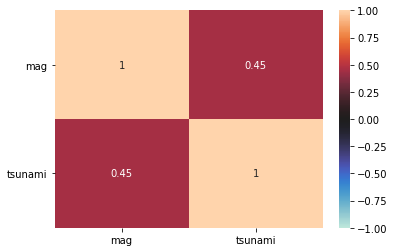

In [5]:
sns.heatmap(quakes_df.query('magType == "mb"')[['mag','tsunami']].corr(), annot=True, center=0, vmin=-1, vmax=1)
plt.yticks(rotation=0)
plt.show()

In [9]:
fb_df = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

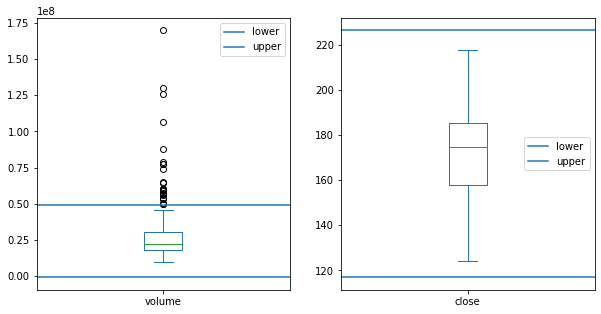

In [20]:
cols = ['volume','close']
fb_sub = fb_df[cols]
quant = fb_sub.quantile([0.25,0.75])
quant.loc['iqr',:] = quant.loc[0.75,:] - quant.loc[0.25,:]
axes = fb_sub.plot(kind='box', subplots=True, figsize=(10,5))
for ax, col in zip(axes, cols):
    stats = quant[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(bound, label=name)
        ax.legend()
plt.show()

In [24]:
covid_df = pd.read_csv('data/covid19_cases.csv', index_col='dateRep', parse_dates=True)

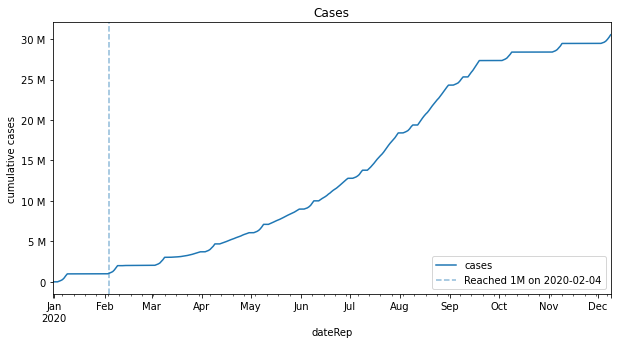

In [25]:
cases = covid_df.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()

ax = cases.plot(title='Cases', figsize=(10, 5))
ax.set_ylabel('cumulative cases')
ax.yaxis.set_major_formatter(EngFormatter())

over_1M = cases[cases >= 1000000].index[0]
ax.axvline(over_1M, linestyle='dashed', alpha=0.5, label=f"Reached 1M on {over_1M.strftime('%Y-%m-%d')}")

ax.legend()

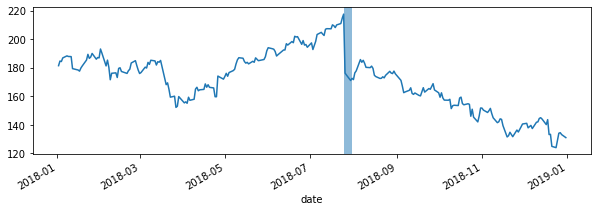

In [26]:
fb_df.close.plot(kind='line', figsize=(10, 3))
plt.axvspan('2018-07-25', '2018-07-31', alpha=0.5,)
plt.show()

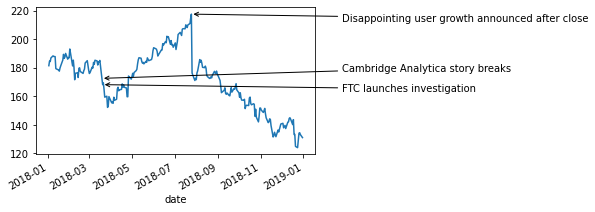

In [33]:
fb_df.close.plot(kind='line', figsize=(5, 3))

x = [('Disappointing user growth announced after close','2018-07-25'),('Cambridge Analytica story breaks','2018-03-19'),('FTC launches investigation','2018-03-20')]
space = -5
for i, date in x:
    y_value = fb_df.close[date]
    plt.annotate(i, xy=(date, y_value), xytext=('2019-02-25', y_value+space),arrowprops=dict(arrowstyle='->'))
    space*=-1

In [36]:
def reg_resid_plots(data):
    n = data.shape[1]
    perm = n * (n - 1)
    fig, ax = plt.subplots(perm, 2, figsize=(15, 4*perm))
    for (x, y), axes, color in zip(itertools.permutations(data.columns, 2), ax, [cm.Dark2(i) for i in range(len(ax))]):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            if func == sns.residplot:
                subplot.set_ylabel('residuals')

    return fig.axes

[<AxesSubplot:xlabel='close', ylabel='volume'>,
 <AxesSubplot:xlabel='close', ylabel='residuals'>,
 <AxesSubplot:xlabel='volume', ylabel='close'>,
 <AxesSubplot:xlabel='volume', ylabel='residuals'>]

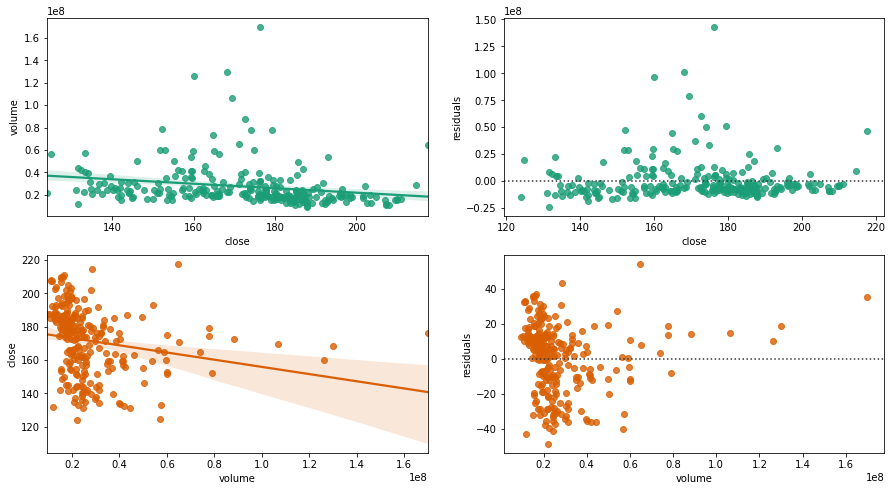

In [37]:
reg_resid_plots(fb_df[['close', 'volume']])